In [1]:
from ml_utilities import ESC50

In [2]:
esc50_path = '/Volumes/Samsung_T5/DataSet Preparation/ESC-50 stuff/ESC-50'
esc50 = ESC50(esc50_path)

In [3]:
esc50.meta[0:3]

[OrderedDict([('filename', '1-100032-A-0.wav'),
              ('fold', '1'),
              ('target', '0'),
              ('category', 'dog'),
              ('esc10', 'True'),
              ('src_file', '100032'),
              ('take', 'A')]),
 OrderedDict([('filename', '1-100038-A-14.wav'),
              ('fold', '1'),
              ('target', '14'),
              ('category', 'chirping_birds'),
              ('esc10', 'False'),
              ('src_file', '100038'),
              ('take', 'A')]),
 OrderedDict([('filename', '1-100210-A-36.wav'),
              ('fold', '1'),
              ('target', '36'),
              ('category', 'vacuum_cleaner'),
              ('esc10', 'False'),
              ('src_file', '100210'),
              ('take', 'A')])]

In [8]:
mnist = esc50.to_mnist(train_folds=[1], test_folds=[], n_fft=2048, hop_length=256)

(220500,) 0 None 44100
slice: (220500,) > (220500,) 0 220499 (220500,) 44100
preslice: (220500,) 0 None 44100
slice: (220500,) > (220500,) 0 220499 (220500,) 44100
preslice: (220500,) 0 None 44100
slice: (220500,) > (220500,) 0 220499 (220500,) 44100
preslice: (220500,) 0 None 44100
slice: (220500,) > (220500,) 0 220499 (220500,) 44100
preslice: (220500,) 0 None 44100
slice: (220500,) > (220500,) 0 220499 (220500,) 44100
preslice: (220500,) 0 None 44100
slice: (220500,) > (220500,) 0 220499 (220500,) 44100
preslice: (220500,) 0 None 44100
slice: (220500,) > (220500,) 0 220499 (220500,) 44100
preslice: (220500,) 0 None 44100
slice: (220500,) > (220500,) 0 220499 (220500,) 44100
preslice: (220500,) 0 None 44100
slice: (220500,) > (220500,) 0 220499 (220500,) 44100
preslice: (220500,) 0 None 44100
slice: (220500,) > (220500,) 0 220499 (220500,) 44100
preslice: (220500,) 0 None 44100
slice: (220500,) > (220500,) 0 220499 (220500,) 44100
preslice: (220500,) 0 None 44100
slice: (220500,) > (

In [9]:
x_train, y_train = mnist[0], mnist[1]

In [10]:
x_train[1].shape

(1025, 862)

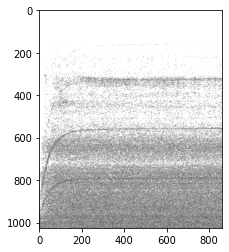

In [13]:
import numpy as np
import matplotlib.pyplot as plt

bit = x_train[2].astype(float)
plt.subplot(111)
plt.imshow(np.flip(bit,0), cmap='gray_r')